In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#importer le dataset
Restaurant = pd.read_csv("Restaurant_revenue.csv")

In [2]:
#Visualisation du dataset
print(Restaurant.head())
print("*********************************************")
print(f"Nombre de lignes et de colonnes: {Restaurant.shape}")
print("*********************************************")
print(Restaurant.describe()) #Statestique

   Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
0                   61   43.117635        12.663793     Japanese   
1                   24   40.020077         4.577892      Italian   
2                   81   41.981485         4.652911     Japanese   
3                   70   43.005307         4.416053      Italian   
4                   30   17.456199         3.475052      Italian   

   Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
0                  36.236133           0       45       350.912040  
1                  17.952562           0       36       221.319091  
2                  22.600420           1       91       326.529763  
3                  18.984098           1       59       348.190573  
4                  12.766143           1       30       185.009121  
*********************************************
Nombre de lignes et de colonnes: (1000, 8)
*********************************************
       Number_of_Customers   Menu_Price  M

In [3]:
#Verifier les valeurs manquantes 
print(Restaurant.isnull().sum())


Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64


In [4]:
#Vérifie s'il y a des NaN dans le DataFrame
if Restaurant.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame ne contient pas de valeurs NaN.


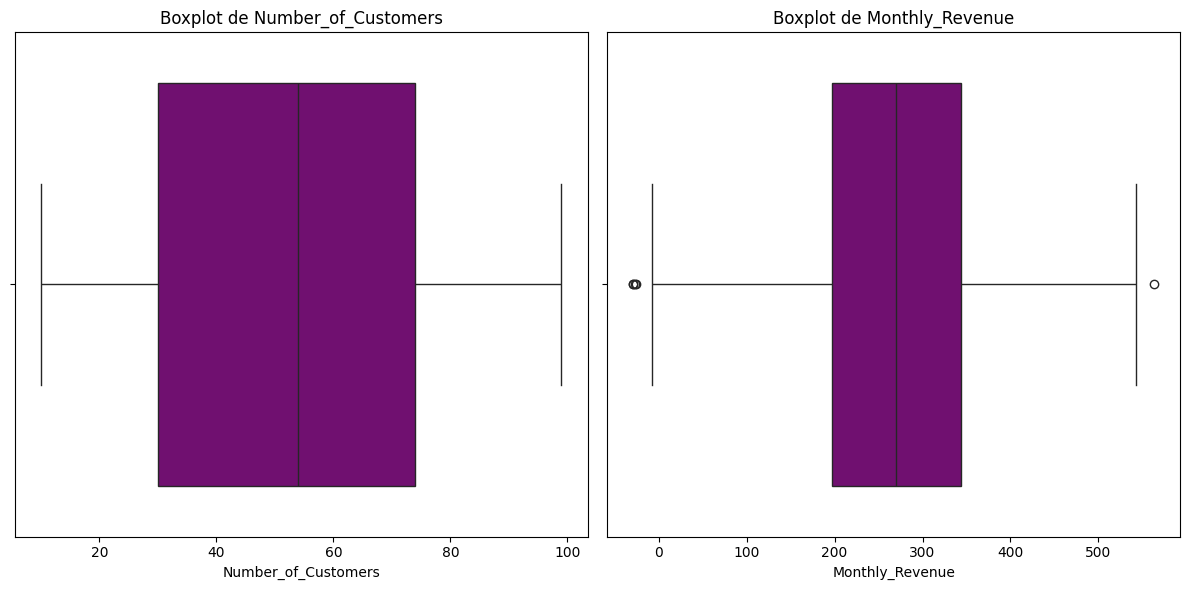

In [5]:
#Verifier les outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un boxplot pour 'Number_of_Customers'
plt.figure(figsize=(12, 6))

# Boxplot pour 'Number_of_Customers'
plt.subplot(1, 2, 1)
sns.boxplot(x=Restaurant['Number_of_Customers'], color='purple')
plt.title("Boxplot de Number_of_Customers")
plt.xlabel("Number_of_Customers")

# Boxplot pour 'Monthly_Revenue'
plt.subplot(1, 2, 2)
sns.boxplot(x=Restaurant['Monthly_Revenue'], color='purple')
plt.title("Boxplot de Monthly_Revenue")
plt.xlabel("Monthly_Revenue")

plt.tight_layout()
plt.show()


In [6]:
#encodage des variables de la colonne Cuisine_Type 
#savoir les valeurs de la colonne Cuisine_Type 
compte_valeurs = Restaurant['Cuisine_Type'].value_counts()
print(compte_valeurs)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Créer une instance de OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False) 
# Appliquer l'encodage One-Hot
encoded_data = onehotencoder.fit_transform(Restaurant[['Cuisine_Type']])
# Convertir le résultat en DataFrame pour une meilleure lisibilité
encoded_df = pd.DataFrame(encoded_data, columns=onehotencoder.get_feature_names_out(['Cuisine_Type'])).astype(int)
# Remplacer la colonne 'Cuisine_Type' dans le DataFrame original
Restaurant = pd.concat([Restaurant.drop(columns=['Cuisine_Type']), encoded_df], axis=1)
print(Restaurant)

Cuisine_Type
Japanese    262
American    256
Mexican     250
Italian     232
Name: count, dtype: int64
     Number_of_Customers  Menu_Price  Marketing_Spend  \
0                     61   43.117635        12.663793   
1                     24   40.020077         4.577892   
2                     81   41.981485         4.652911   
3                     70   43.005307         4.416053   
4                     30   17.456199         3.475052   
..                   ...         ...              ...   
995                   73   41.307842        12.122931   
996                   31   20.615496         5.822885   
997                   69   17.110656         4.141898   
998                   73   37.664722         3.046556   
999                   81   34.722067        17.989104   

     Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  \
0                    36.236133           0       45       350.912040   
1                    17.952562           0       36       221.319091

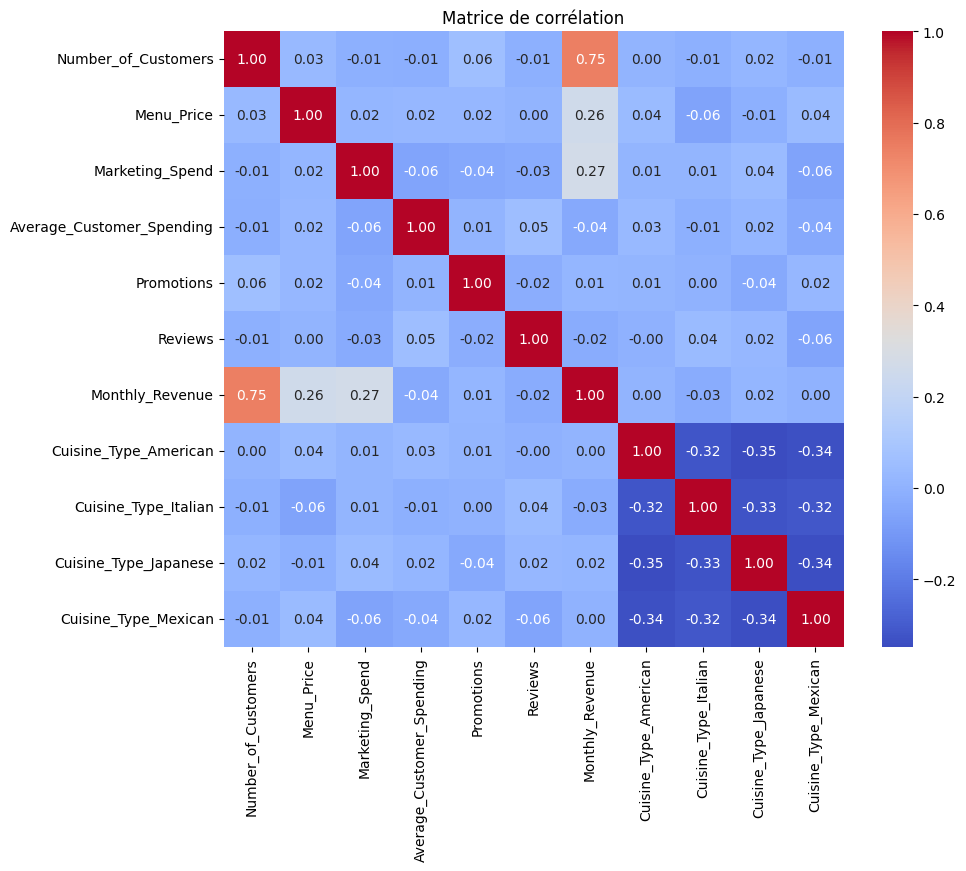

In [7]:
#la matrice de corrélation pour choisir les deux variables 
import pandas as pd          # Pour la manipulation des données
import matplotlib.pyplot as plt  # Pour les visualisations
import seaborn as sns         # Pour des visualisations plus avancées et élégantes
import numpy as np            # Pour les opérations numériques
restaurant_df=pd.DataFrame(Restaurant)
corr_matrix = Restaurant.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

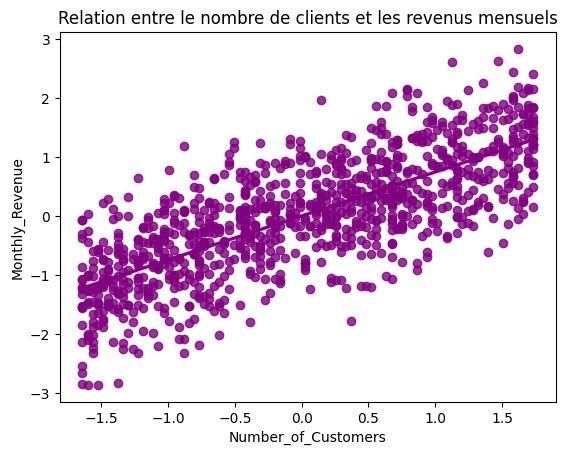

In [8]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
Restaurant[['Number_of_Customers', 'Monthly_Revenue']]= scaler.fit_transform(Restaurant[['Number_of_Customers', 'Monthly_Revenue']]) 

# Visualisation de la relation entre le nombre de clients et les revenus mensuels
sns.regplot(x='Number_of_Customers', y='Monthly_Revenue', data=Restaurant, color='purple')
plt.title("Relation entre le nombre de clients et les revenus mensuels")
plt.show()


Interprétation des corrélations :

1) Variables fortement corrélées :
      1)  Number_of_Customers et Monthly_Revenue : Avec une corrélation de 0.745, ces deux variables sont fortement corrélées. Cela signifie qu'une augmentation du nombre de clients semble être associée à une augmentation du revenu mensuel, ce qui est attendu dans un contexte commercial.

2) Relations faibles ou nulles :
      1) Cuisine_Type_American et Monthly_Revenue : La corrélation est de 0.004970, ce qui montre qu'il n'y a pratiquement pas de lien direct entre le type de cuisine (américaine) et le revenu mensuel.
      2)  Promotions et Reviews : La corrélation est faible (0.006620), ce qui suggère que les promotions ne sont pas directement liées aux critiques dans ce dataset.
      3)  Marketing_Spend et Average_Customer_Spending : Une corrélation de -0.058586 signifie qu'il y a une très faible relation entre ces deux variables, donc le montant des dépenses marketing n'affecte pas directement le montant dépensé par chaque client.

3) Relations intéressantes à explorer davantage :
      1) Menu_Price et Monthly_Revenue : Corrélation de 0.259, ce qui indique une relation modérée entre le prix du menu et le revenu mensuel. Vous pourriez explorer cette relation pour comprendre si des menus plus chers génèrent des revenus plus élevés.
      2) Cuisine_Type_Italian et Cuisine_Type_American : Il y a une corrélation négative entre ces deux types de cuisine (-0.322401), ce qui pourrait suggérer qu'un restaurant qui propose de la cuisine italienne est moins susceptible de proposer de la cuisine américaine, ou inversement.

In [9]:
from sklearn.model_selection import train_test_split

# Supposons que vous ayez un DataFrame df avec les caractéristiques X et les étiquettes y
X = Restaurant.drop(columns=['Monthly_Revenue'])  # Remplacez 'Monthly_Revenue' par le nom de votre colonne cible
y = Restaurant['Monthly_Revenue']

# Diviser les données en 20% pour l'entraînement et 80% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Nombre total de données
total_data = len(Restaurant)

# Tailles des ensembles
train_size = len(X_train)
test_size = len(X_test)

# Calcul des pourcentages
train_percentage = train_size / total_data * 100
test_percentage = test_size / total_data * 100

# Affichage des résultats
print(f"Entraînement: {train_size} échantillons ({train_percentage:.0f}%)")
print(f"Test: {test_size} échantillons ({test_percentage:.0f}%)")


Entraînement: 200 échantillons (20%)
Test: 800 échantillons (80%)


QUESTION 03 : 

1- Régression linéaire

Pente (b1): 0.6915183751606657
Ordonnée à l'origine (b0): 0.035285006693027005
Temps d'entraînement: 0.0043 secondes
Mean Squared Error (MSE) : 0.45
R² Score : 0.56


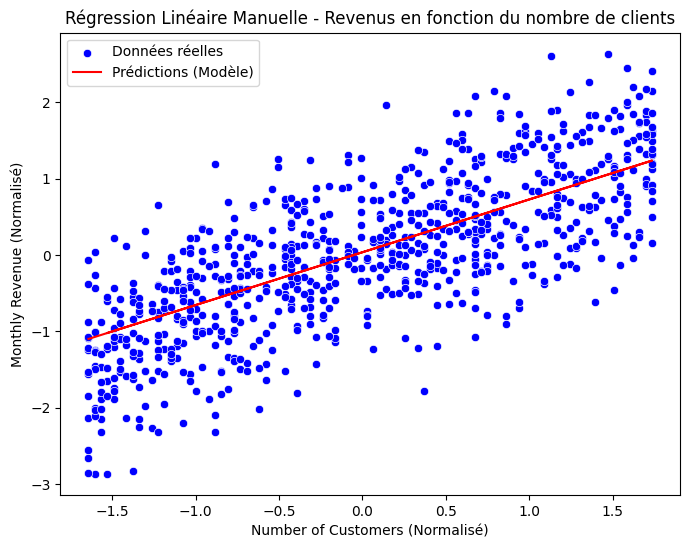

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Début du chronométrage pour l'entraînement uniquement
start_training_time = time.time()

# **Calcul manuel des coefficients de régression**
# Calcul des moyennes des données d'entraînement
x_mean = X_train['Number_of_Customers'].mean()
y_mean = y_train.mean()

# Calcul de la pente (b1) et de l'ordonnée à l'origine (b0)
numerator = np.sum((X_train['Number_of_Customers'] - x_mean) * (y_train - y_mean))  # Covariance
denominator = np.sum((X_train['Number_of_Customers'] - x_mean) ** 2)               # Variance
b1 = numerator / denominator  # Pente
b0 = y_mean - b1 * x_mean     # Ordonnée à l'origine

# Fin du chronométrage pour l'entraînement
end_training_time = time.time()

# Calcul du temps d'entraînement
training_time = end_training_time - start_training_time

print(f"Pente (b1): {b1}")
print(f"Ordonnée à l'origine (b0): {b0}")
print(f"Temps d'entraînement: {training_time:.4f} secondes")

# **Faire des prédictions sur l'ensemble de test**
# Prédictions basées sur l'équation y_pred = b0 + b1 * X
y_pred = b0 + b1 * X_test['Number_of_Customers']

# **Évaluation du modèle**
# Calcul du Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred) ** 2)

# Calcul du R² (coefficient de détermination)
ss_total = np.sum((y_test - y_test.mean()) ** 2)  # Somme des carrés totale
ss_residual = np.sum((y_test - y_pred) ** 2)     # Somme des carrés résiduels
r2_score = 1 - (ss_residual / ss_total)

print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"R² Score : {r2_score:.2f}")

# **Visualisation des résultats**

# Création du graphique des données réelles et des prédictions
plt.figure(figsize=(8, 6))  # Définir la taille de la figure

# Nuage de points des données réelles
sns.scatterplot(x=X_test['Number_of_Customers'], y=y_test, color='blue', label='Données réelles')

# Ligne rouge représentant les prédictions calculées
plt.plot(X_test['Number_of_Customers'], y_pred, color='red', label='Prédictions (Modèle)')

# Ajout des labels et titre
plt.xlabel("Number of Customers (Normalisé)")
plt.ylabel("Monthly Revenue (Normalisé)")
plt.title("Régression Linéaire Manuelle - Revenus en fonction du nombre de clients")
plt.legend()

# Affichage du graphique
plt.show()


 un R² de 0.56 montre que le modèle est modéré. Il explique une partie de la variation des revenus, mais il existe encore beaucoup d'autres facteurs à prendre en compte.
Ce modèle pourrait être utile pour des prédictions approximatives, mais si tu souhaites une meilleure précision (pour une meilleure prise de décision, par exemple), tu devrais probablement améliorer ton modèle, par exemple en ajoutant des variables supplémentaires (comme les promotions, les prix du menu, etc.) ou en explorant des modèles plus complexes (régression polynomiale, Ridge, Lasso).

2- Régression polynomiale 

Degré 1 - Mean Squared Error (MSE) : 0.45
Degré 1 - R² Score : 0.56
Degré 1 - Temps d'entraînement : 0.005620 secondes
Degré 2 - Mean Squared Error (MSE) : 0.45
Degré 2 - R² Score : 0.56
Degré 2 - Temps d'entraînement : 0.000349 secondes
Degré 3 - Mean Squared Error (MSE) : 0.45
Degré 3 - R² Score : 0.56
Degré 3 - Temps d'entraînement : 0.000244 secondes
Degré 4 - Mean Squared Error (MSE) : 0.45
Degré 4 - R² Score : 0.55
Degré 4 - Temps d'entraînement : 0.000133 secondes
Degré 5 - Mean Squared Error (MSE) : 0.46
Degré 5 - R² Score : 0.55
Degré 5 - Temps d'entraînement : 0.000508 secondes
Degré 6 - Mean Squared Error (MSE) : 0.46
Degré 6 - R² Score : 0.55
Degré 6 - Temps d'entraînement : 0.000135 secondes
Degré 7 - Mean Squared Error (MSE) : 0.46
Degré 7 - R² Score : 0.55
Degré 7 - Temps d'entraînement : 0.000177 secondes
Degré 8 - Mean Squared Error (MSE) : 0.46
Degré 8 - R² Score : 0.55
Degré 8 - Temps d'entraînement : 0.000223 secondes
Degré 9 - Mean Squared Error (MSE) : 0.47
Degré 

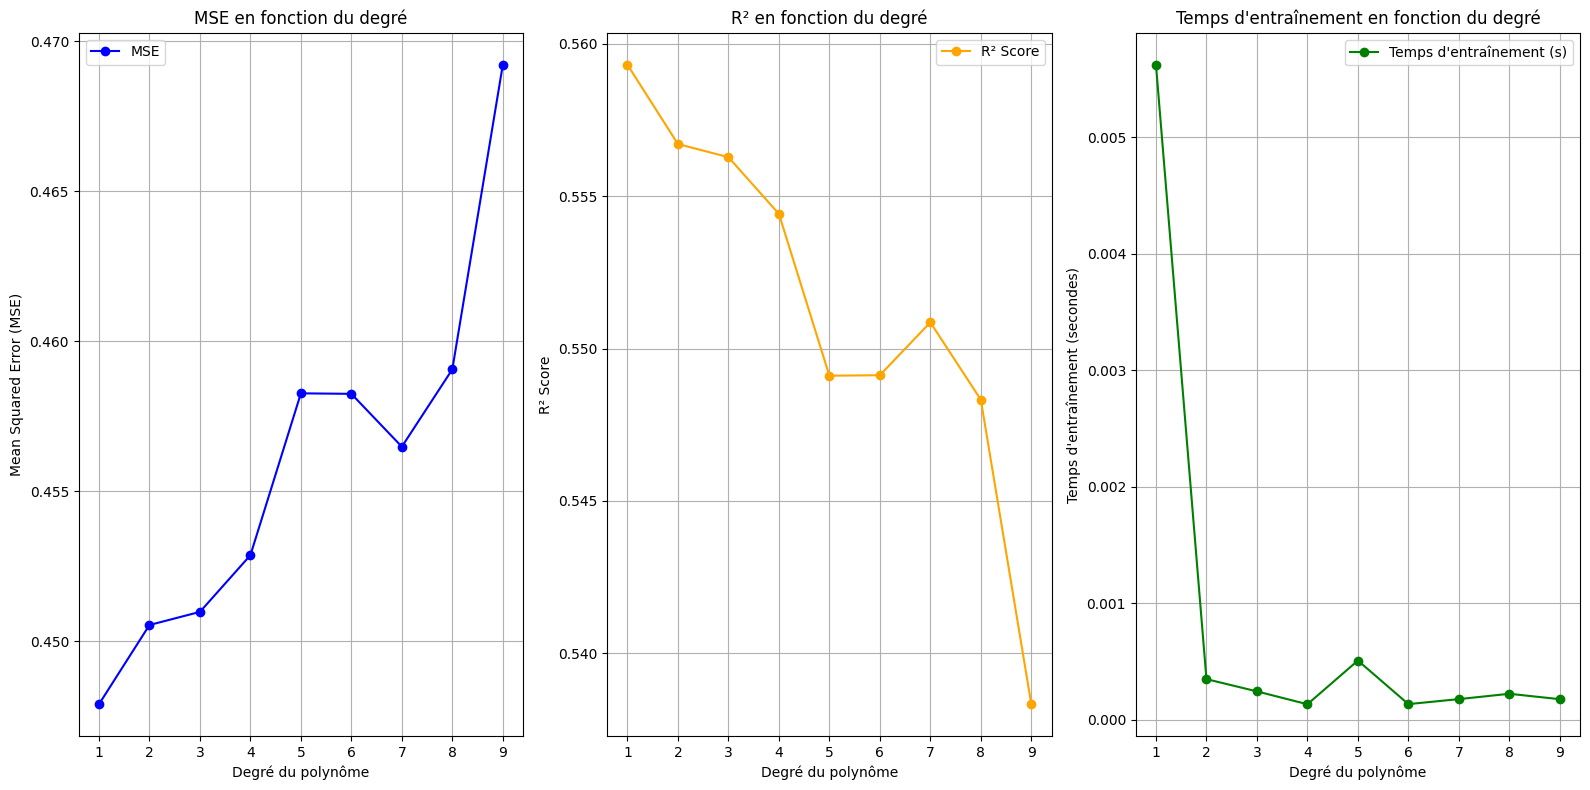

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

# Tester des degrés de 1 à 9
degrees = range(1, 10)
mse_scores = []
r2_scores = []
training_times = []

for degree in degrees:
    # Génération des termes polynomiaux
    X_train_poly = X_train[['Number_of_Customers']].copy()
    X_test_poly = X_test[['Number_of_Customers']].copy()
    
    for d in range(2, degree + 1):
        X_train_poly[f'Number_of_Customers^{d}'] = X_train['Number_of_Customers'] ** d
        X_test_poly[f'Number_of_Customers^{d}'] = X_test['Number_of_Customers'] ** d

    # Transformation en matrices
    X_poly_train = np.c_[np.ones(len(X_train_poly)), X_train_poly.values]  # Ajouter b0
    X_poly_test = np.c_[np.ones(len(X_test_poly)), X_test_poly.values]
    y_train_values = y_train.values  # Convertir en array

    # Mesure du temps d'entraînement avec timeit
    def train_model():
        return np.linalg.pinv(X_poly_train.T @ X_poly_train) @ X_poly_train.T @ y_train_values

    training_time = timeit.timeit(train_model, number=1)
    training_times.append(training_time)

    # Calcul des coefficients
    theta = train_model()

    # Prédictions
    y_pred = X_poly_test @ theta

    # Évaluation des performances
    mse = np.mean((y_test - y_pred) ** 2)
    ss_total = np.sum((y_test - y_test.mean()) ** 2)
    ss_residual = np.sum((y_test - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Degré {degree} - Mean Squared Error (MSE) : {mse:.2f}")
    print(f"Degré {degree} - R² Score : {r2:.2f}")
    print(f"Degré {degree} - Temps d'entraînement : {training_time:.6f} secondes")

# Visualisation des MSE, R² et Temps d'entraînement pour chaque degré
plt.figure(figsize=(16, 8))

# MSE
plt.subplot(1, 3, 1)
plt.plot(degrees, mse_scores, marker='o', color='blue', label='MSE')
plt.xlabel('Degré du polynôme')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE en fonction du degré')
plt.grid()
plt.legend()

# R²
plt.subplot(1, 3, 2)
plt.plot(degrees, r2_scores, marker='o', color='orange', label='R² Score')
plt.xlabel('Degré du polynôme')
plt.ylabel('R² Score')
plt.title('R² en fonction du degré')
plt.grid()
plt.legend()

# Temps d'entraînement
plt.subplot(1, 3, 3)
plt.plot(degrees, training_times, marker='o', color='green', label='Temps d\'entraînement (s)')
plt.xlabel('Degré du polynôme')
plt.ylabel('Temps d\'entraînement (secondes)')
plt.title('Temps d\'entraînement en fonction du degré')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Degré 1 - AIC : -638.56
Degré 1 - BIC : 4718.49
Degré 2 - AIC : -631.86
Degré 2 - BIC : 4729.88
Degré 3 - AIC : -629.08
Degré 3 - BIC : 4737.35
Degré 4 - AIC : -623.74
Degré 4 - BIC : 4747.38
Degré 5 - AIC : -612.26
Degré 5 - BIC : 4763.54
Degré 6 - AIC : -610.28
Degré 6 - BIC : 4770.20
Degré 7 - AIC : -611.37
Degré 7 - BIC : 4773.80
Degré 8 - AIC : -604.86
Degré 8 - BIC : 4784.99
Degré 9 - AIC : -585.35
Degré 9 - BIC : 4809.18


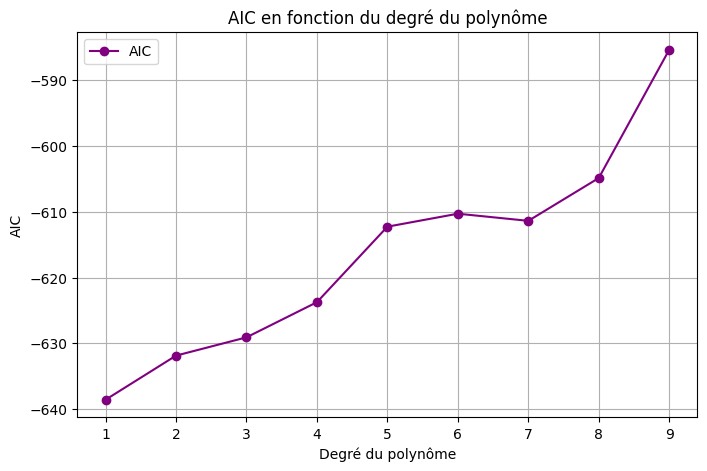

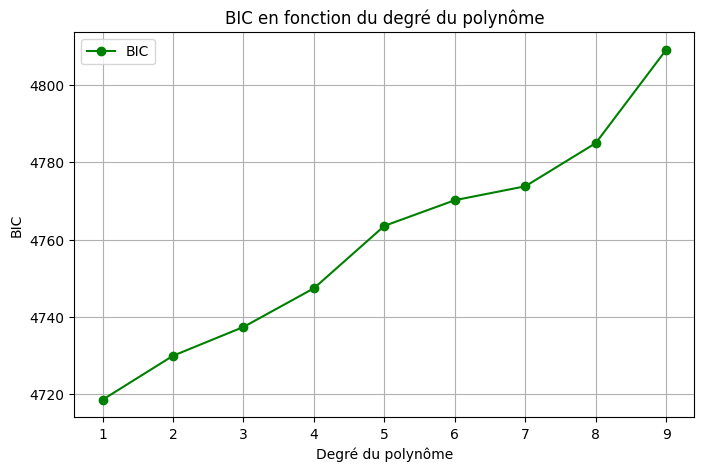

In [12]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Fonction pour calculer AIC et BIC
def calculate_aic_bic(y_test, y_pred, num_params):
    n = len(y_test)  # Nombre d'échantillons
    sse = np.sum((y_test - y_pred) ** 2)  # Somme des carrés des résidus (SSE)
    aic = n * np.log(sse / n) + 2 * num_params
    bic = n * np.log(sse) + num_params * np.log(n)
    return aic, bic

# Préparation des données
X = Restaurant.drop(columns=['Monthly_Revenue'])  # Remplacez 'Monthly_Revenue' par votre colonne cible
y = Restaurant['Monthly_Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Initialisation des listes pour stocker les résultats
degrees = range(1, 10)
aic_scores = []
bic_scores = []

for degree in degrees:
    # Génération des termes polynomiaux
    X_train_poly = X_train[['Number_of_Customers']].copy()
    X_test_poly = X_test[['Number_of_Customers']].copy()
    
    for d in range(2, degree + 1):
        X_train_poly[f'Number_of_Customers^{d}'] = X_train['Number_of_Customers'] ** d
        X_test_poly[f'Number_of_Customers^{d}'] = X_test['Number_of_Customers'] ** d

    # Transformation en matrices
    X_poly_train = np.c_[np.ones(len(X_train_poly)), X_train_poly.values]  # Ajouter b0
    X_poly_test = np.c_[np.ones(len(X_test_poly)), X_test_poly.values]
    y_train_values = y_train.values  # Convertir en array

    # Entraînement du modèle
    def train_model():
        return np.linalg.pinv(X_poly_train.T @ X_poly_train) @ X_poly_train.T @ y_train_values

    theta = train_model()

    # Prédictions
    y_pred = X_poly_test @ theta

    # Calcul des critères AIC et BIC
    num_params = len(theta)  # Nombre de paramètres estimés (coefficients + intercept)
    aic, bic = calculate_aic_bic(y_test, y_pred, num_params)

    aic_scores.append(aic)
    bic_scores.append(bic)

    print(f"Degré {degree} - AIC : {aic:.2f}")
    print(f"Degré {degree} - BIC : {bic:.2f}")

# Visualisation des AIC
plt.figure(figsize=(8, 5))
plt.plot(degrees, aic_scores, marker='o', color='purple', label='AIC')
plt.xlabel('Degré du polynôme')
plt.ylabel('AIC')
plt.title('AIC en fonction du degré du polynôme')
plt.grid()
plt.legend()
plt.show()

# Visualisation des BIC
plt.figure(figsize=(8, 5))
plt.plot(degrees, bic_scores, marker='o', color='green', label='BIC')
plt.xlabel('Degré du polynôme')
plt.ylabel('BIC')
plt.title('BIC en fonction du degré du polynôme')
plt.grid()
plt.legend()
plt.show()


Le meilleur degré est 1 car :

Il a le même MSE (0.45) et R² (0.56) que les degrés 2 et 3, mais il est plus simple. À partir du degré 4, les performances se dégradent (MSE augmente et R² diminue). Conclusion : Utilisez une régression linéaire simple (degré 1) pour représenter votre dataset.

Conclusion :

Après avoir comparé la régression linéaire simple et les régressions polynomiales de différents degrés, il apparaît que la régression linéaire simple est le meilleur modèle. Bien que les performances en termes de MSE et R² soient similaires entre les modèles, la régression linéaire présente des valeurs plus faibles pour l'AIC et le BIC, indiquant une meilleure efficacité en termes de compromis entre ajustement et complexité. Ainsi, le modèle linéaire simple offre un meilleur équilibre entre performance et simplicité et est donc le choix optimal pour ce problème.


*****************************************************************************************************************************

3- Regularisation :


Résultats des Modèles :
Ridge: MSE = 0.45, R² = 0.56, Temps d'entraînement = 0.0100 secondes
Lasso: MSE = 0.47, R² = 0.54, Temps d'entraînement = 0.0051 secondes


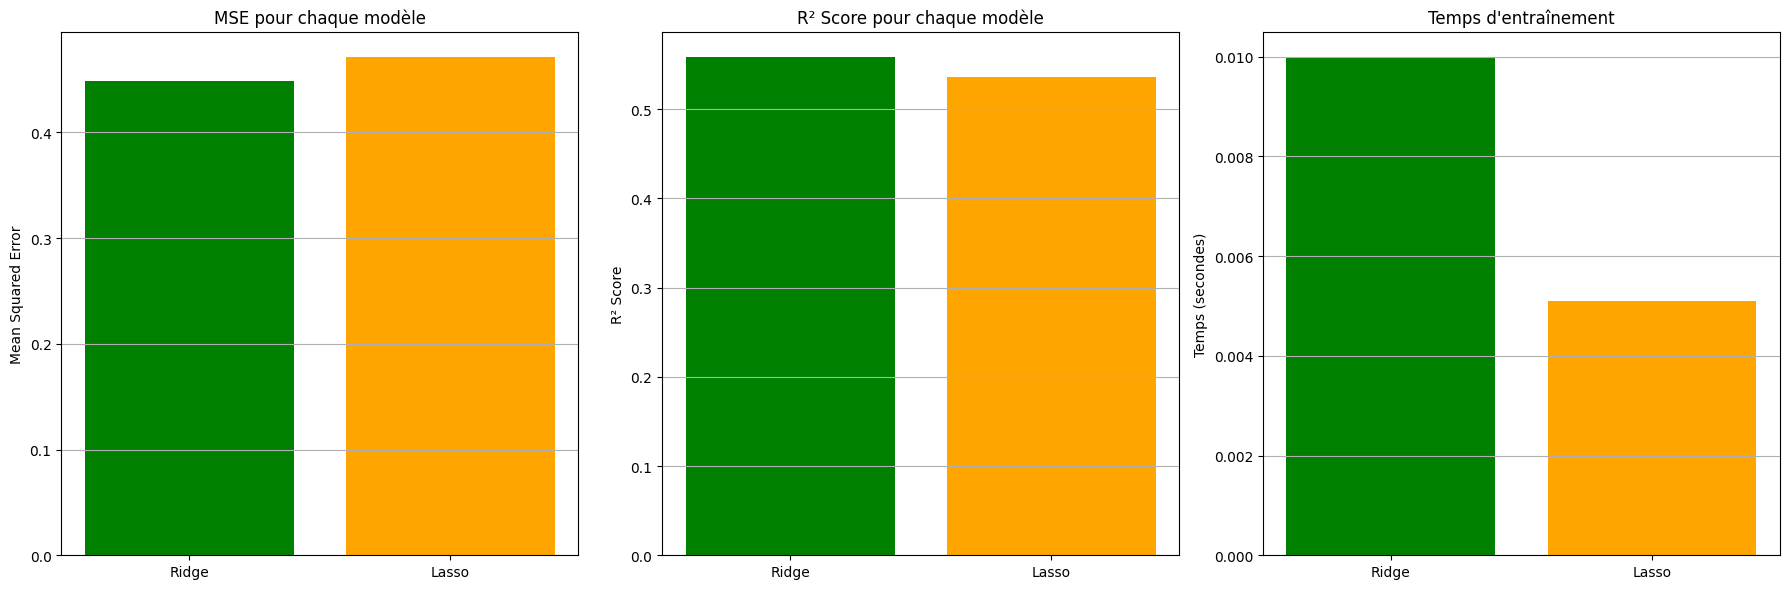

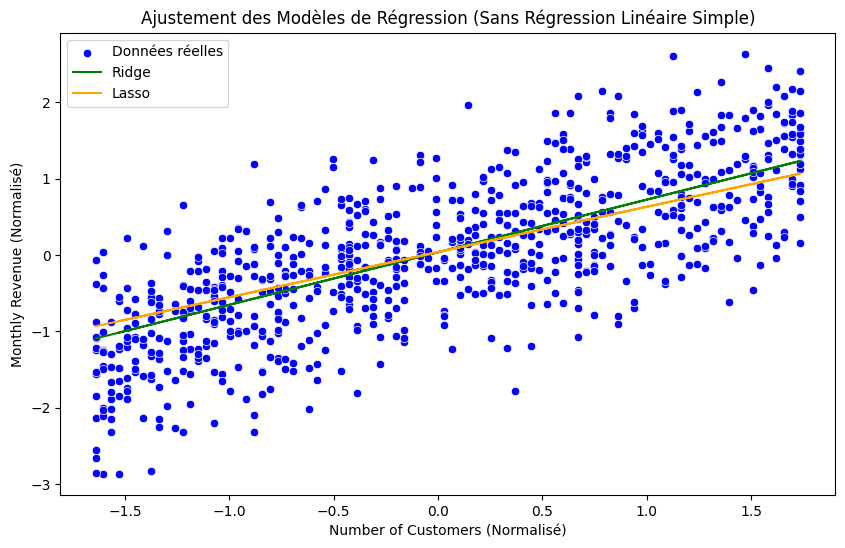

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import time

# Initialisation des modèles (Ridge et Lasso)
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

# Dictionnaires pour stocker les résultats
mse_scores = {}
r2_scores = {}
training_times = {}

# Entraînement et évaluation pour chaque modèle
for model_name, model in models.items():
    # Mesure du temps d'entraînement uniquement
    start_training_time = time.time()
    model.fit(X_train[['Number_of_Customers']], y_train)  # Entraînement
    end_training_time = time.time()
    
    training_time = end_training_time - start_training_time  # Temps d'entraînement
    
    # Prédictions et évaluation
    y_pred = model.predict(X_test[['Number_of_Customers']])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Stockage des résultats
    mse_scores[model_name] = mse
    r2_scores[model_name] = r2
    training_times[model_name] = training_time

# Affichage des résultats
print("\nRésultats des Modèles :")
for model_name in models.keys():
    print(f"{model_name}: MSE = {mse_scores[model_name]:.2f}, R² = {r2_scores[model_name]:.2f}, Temps d'entraînement = {training_times[model_name]:.4f} secondes")

# Visualisation des métriques
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MSE
axes[0].bar(mse_scores.keys(), mse_scores.values(), color=['green', 'orange'])
axes[0].set_title("MSE pour chaque modèle")
axes[0].set_ylabel("Mean Squared Error")
axes[0].grid(axis='y')

# R²
axes[1].bar(r2_scores.keys(), r2_scores.values(), color=['green', 'orange'])
axes[1].set_title("R² Score pour chaque modèle")
axes[1].set_ylabel("R² Score")
axes[1].grid(axis='y')

# Temps d'entraînement
axes[2].bar(training_times.keys(), training_times.values(), color=['green', 'orange'])
axes[2].set_title("Temps d'entraînement")
axes[2].set_ylabel("Temps (secondes)")
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()

# Visualisation de l'ajustement
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Number_of_Customers'], y=y_test, color='blue', label='Données réelles')

# Ridge
ridge_model = models["Ridge"]
plt.plot(X_test['Number_of_Customers'], ridge_model.predict(X_test[['Number_of_Customers']]), color='green', label='Ridge')

# Lasso
lasso_model = models["Lasso"]
plt.plot(X_test['Number_of_Customers'], lasso_model.predict(X_test[['Number_of_Customers']]), color='orange', label='Lasso')

# Détails graphiques
plt.xlabel("Number of Customers (Normalisé)")
plt.ylabel("Monthly Revenue (Normalisé)")
plt.title("Ajustement des Modèles de Régression (Sans Régression Linéaire Simple)")
plt.legend()
plt.show()


La régression Ridge s'avère être une alternative intéressante à la régression linéaire simple, offrant des performances identiques en termes de MSE et R², avec un léger surcoût en temps d'entraînement. Lasso, bien que légèrement moins performant, pourrait être privilégié dans des cas où la sélection des variables est critique. Ces résultats montrent que le choix du modèle dépendra principalement des priorités entre précision, vitesse d'entraînement et besoins en régularisation.

Comparaison des modeles :

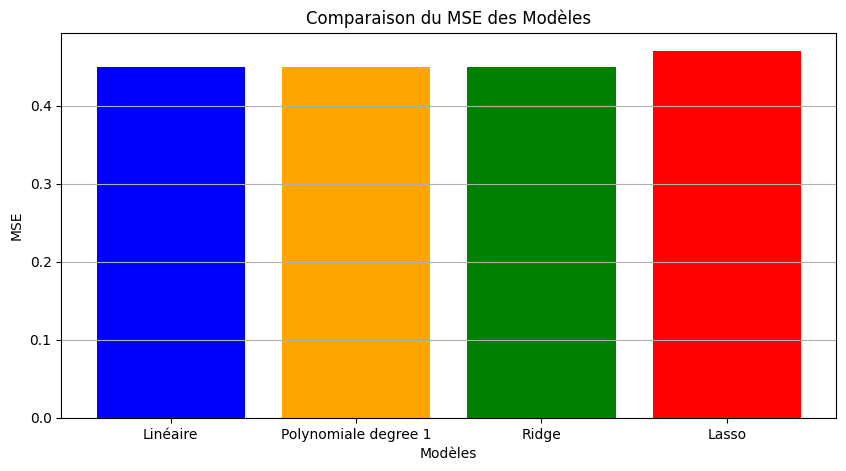

In [14]:
import matplotlib.pyplot as plt

models = ['Linéaire', 'Polynomiale degree 1', 'Ridge', 'Lasso']
mse_values = [0.45, 0.45, 0.45, 0.47]

plt.figure(figsize=(10,5))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Comparaison du MSE des Modèles')
plt.xlabel('Modèles')
plt.ylabel('MSE')
plt.grid(axis='y')
plt.show()

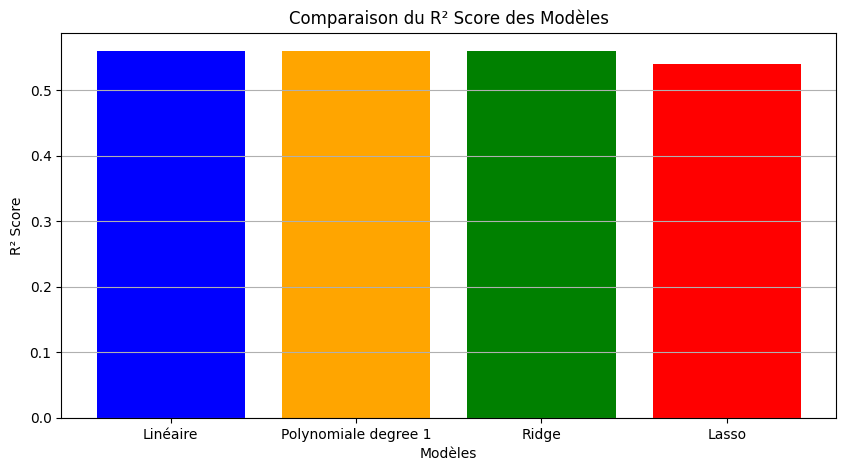

In [15]:

r2_values = [0.56, 0.56, 0.56, 0.54]

plt.figure(figsize=(10,5))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Comparaison du R² Score des Modèles')
plt.xlabel('Modèles')
plt.ylabel('R² Score')
plt.grid(axis='y')
plt.show()

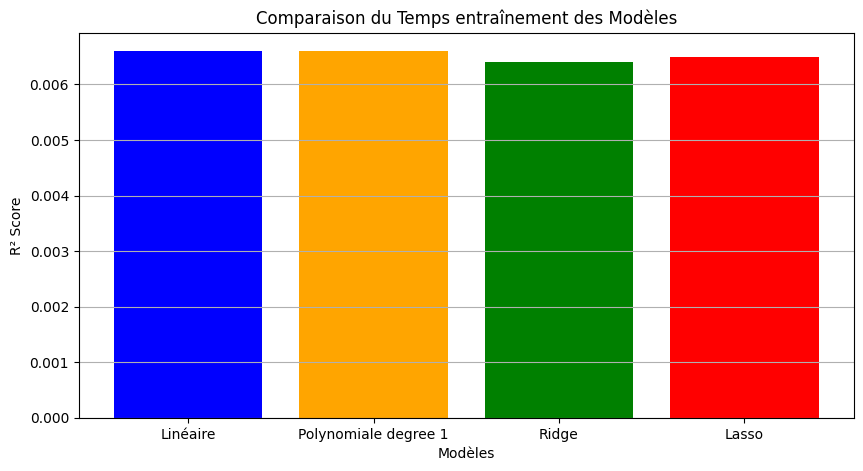

In [16]:

r2_values = [0.0066, 0.0066 , 0.0064 , 0.0065]

plt.figure(figsize=(10,5))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Comparaison du Temps entraînement des Modèles')
plt.xlabel('Modèles')
plt.ylabel('R² Score')
plt.grid(axis='y')
plt.show()